## MMSB: Beer Survey

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import mmsb
import utils

%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.debugger import Tracer
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [2]:
data = pd.read_csv('../data/all_our_ideas/2565/2565_dat.csv', header=None)
text = pd.read_csv('../data/all_our_ideas/2565/2565_text_map.csv', header=None)[1]
data.head()

,0,1,2,3
0,2,5,0,749d8459047a7c024738d643524b889a
1,11,20,0,0cdd2260af00904baedc94baa0050fd6
2,2,19,1,f933c71f15dfb64842fd9832e3734ad4
3,4,11,1,f933c71f15dfb64842fd9832e3734ad4
4,9,20,0,0cdd2260af00904baedc94baa0050fd6


In [3]:
data = data[data[3] != '1bc8052fc357986cea6bf530ff4d5d3a'] # Most prolific user

In [4]:
X = data[[0,1,2]].values
X.shape

(224, 3)

In [5]:
V = max(X[:,1]) + 1
V

27

In [6]:
np.random.shuffle(X)
X_train, X_test = X[:150], X[150:]
X_train.shape, X_test.shape

((150, 3), (74, 3))

In [7]:
sum(X_test[:,2] == 0) / float(len(X_test))

0.51351351351351349

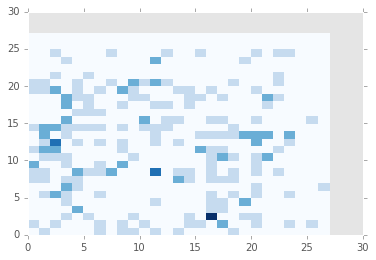

In [10]:
I = pd.DataFrame(utils.get_interactions(X, V))
plt.pcolor(I, cmap='Blues')

## Tests

0:00:01.281174


0.56756756756756754

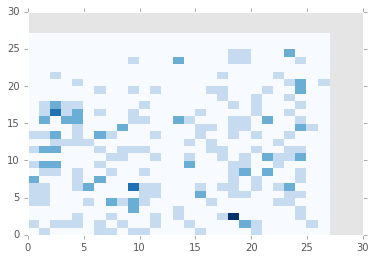

In [20]:
K = 3
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X_train, V, K, n_iter=400)
ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')
probs = [gamma[:,p].dot(B).dot(gamma[:,q]) for p, q, v in X_test]
sum(X_test[:,2] == np.round(probs)) / float(len(X_test))

0:00:00.962243
0:00:01.195765
0:00:01.247917
0:00:01.362906
0:00:01.460031
0:00:01.647332
0:00:01.872177
0:00:01.968669
0:00:02.186235
0:00:02.509956
0:00:02.693444
0:00:03.028466
0:00:03.314107
0:00:03.659520


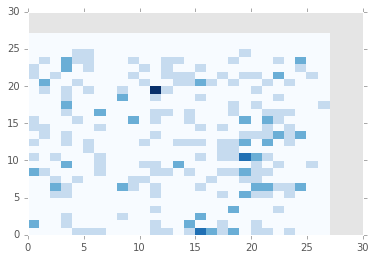

In [14]:
results = []
for K in xrange(1,15):
    gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X_train, V, K, n_iter=400)
    ptypes = pd.DataFrame(gamma).idxmax().sort_values().index
    plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')
    probs = [gamma[:,p].dot(B).dot(gamma[:,q]) for p, q, v in X_test]
    results.append((K, sum(X_test[:,2] == np.round(probs)) / float(len(X_test))))

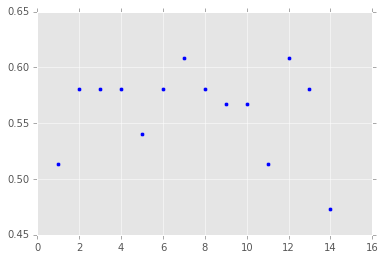

In [15]:
x, y = zip(*results)
plt.scatter(x=x, y=y)